<a href="https://colab.research.google.com/github/ShishkinaMarina/LAB/blob/main/6_3_shishkina_ru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Clustering 2

In [17]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale
from sklearn.metrics import homogeneity_score, silhouette_score
from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Пример: набор данных MNIST

Набор данных рукописных цифр MNIST состоит из изображений рукописных цифр вместе с метками, указывающими, какая цифра находится на каждом изображении.

Поскольку в этом наборе данных присутствуют как объекты, так и метки (а метки для больших наборов данных обычно трудно/дорого получить), этот набор данных часто используется в качестве эталона для сравнения различных методов.
Например, [эта веб-страница](http://yann.lecun.com/exdb/mnist/) описывает множество различных результатов классификации в MNIST (обратите внимание, тесты на этом веб-сайте предназначены для набора данных большего размера и с более высоким разрешением, чем мы воспользуюсь.) Чтобы увидеть сравнение методов классификации, реализованных в scikit-learn в наборе данных MNIST, см.
[эта страница](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
Набор данных MNIST также часто используется для сравнительного анализа алгоритмов кластеризации, и поскольку он имеет метки, мы можем оценить однородность или чистоту кластеров.

Существует несколько версий набора данных. Мы будем использовать тот, который встроен в scikit-learn и описан [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

* Классы: 10
* Образцы на класс: $\approx$180.
* Всего образцов: 1797
* Размерность: 64 (8 пикселей на 8 пикселей)
* Возможности: целые числа 0–16.

Вот несколько примеров изображений. Обратите внимание, что цифры нормализованы по размеру и центрированы в изображении фиксированного размера ($8\times8$ пикселей).

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


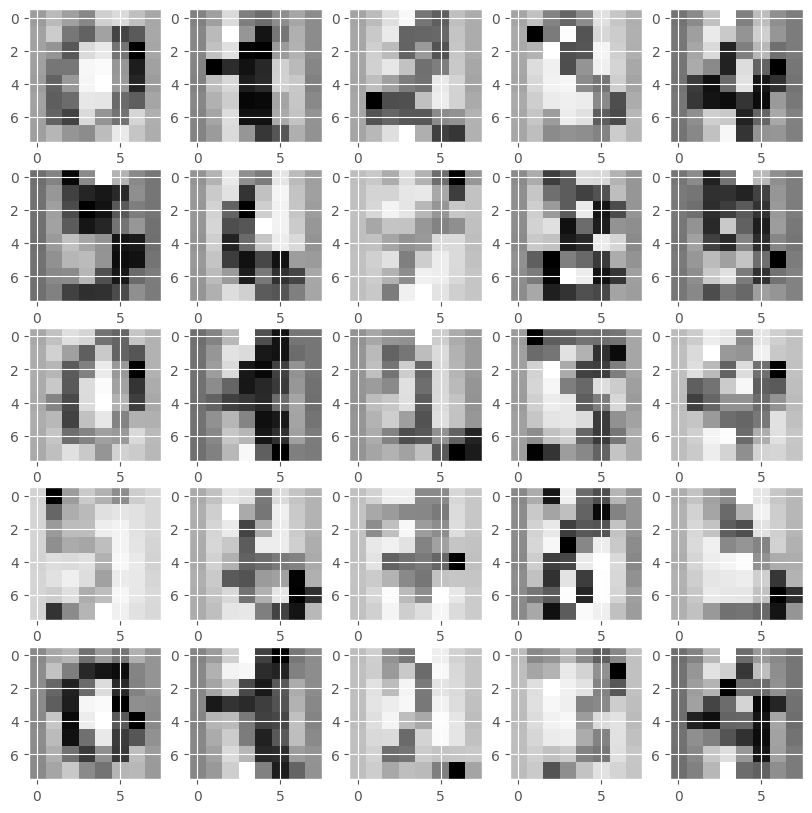

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
Сначала мы используем метод k-средних для кластеризации набора данных и вычисления показателя однородности для кластеризации.

In [8]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.6734329901498703

#### Упражнение: Иерархическая кластеризация
Используйте метод иерархической кластеризации для кластеризации набора данных. Снова вычислите однородность.

*Подсказка:* Используйте функцию scikit-learn *AgglomerativeClustering*.

In [10]:
agglomerative = AgglomerativeClustering(n_clusters=n_digits)
agglomerative_labels = agglomerative.fit_predict(X)
agglomerative_homogeneity = metrics.homogeneity_score(labels_true=y, labels_pred=agglomerative_labels)
print(f"Однородность (Иерархическая кластеризация): {agglomerative_homogeneity:.4f}")

Однородность (Иерархическая кластеризация): 0.7585


#### Упражнение: DBScan

Используйте DBScan для кластеризации набора данных. Проблема, с которой вы столкнетесь, — это выбор $\epsilon$. Вы можете использовать функцию DistanceMetric, чтобы получить представление о типичных расстояниях между точками.

In [11]:
import pandas as pd
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances

array([[ 0.        , 10.98806596, 10.52532875, ...,  9.2994515 ,
         6.84900324,  9.49759216],
       [10.98806596,  0.        ,  8.25397221, ...,  7.0787308 ,
         8.71578265, 10.22795622],
       [10.52532875,  8.25397221,  0.        , ...,  7.74350226,
         9.92822922,  8.9882344 ],
       ...,
       [ 9.2994515 ,  7.0787308 ,  7.74350226, ...,  0.        ,
         7.82109714,  7.25101691],
       [ 6.84900324,  8.71578265,  9.92822922, ...,  7.82109714,
         0.        ,  8.71775266],
       [ 9.49759216, 10.22795622,  8.9882344 , ...,  7.25101691,
         8.71775266,  0.        ]])

In [12]:
df = pd.DataFrame(distances)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,9.429465,9.602031,10.347161,9.320771,10.483066,9.764437,9.368594,11.206563,9.250916,9.740384,...,9.167075,11.201947,10.214618,9.209303,11.025827,9.097838,9.804845,9.335236,9.227846,10.106628
std,3.025238,2.879556,2.702908,2.941581,2.783363,2.856713,2.930177,2.670607,2.803061,2.750411,...,2.871609,2.926652,2.738580,2.840153,2.961698,3.006655,3.004637,2.836908,2.856528,2.718451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.377907,8.445101,9.152263,8.055664,9.289648,8.457454,8.032772,10.200947,8.068446,8.527683,...,7.835470,9.791565,9.138989,7.983034,9.657150,7.529115,8.649545,8.123597,7.896166,8.822764
50%,9.269402,9.473299,10.103218,9.089083,10.210529,9.448140,9.221662,11.112941,8.837322,9.337980,...,8.838463,11.135542,9.998645,9.003926,10.920055,8.876145,9.649613,9.085757,8.921825,9.756183
75%,10.304851,10.380412,11.030820,10.050466,11.209419,10.524195,10.263819,11.886140,9.889272,10.310384,...,9.862368,12.239369,10.847290,9.905428,12.187147,10.014563,10.723950,9.988732,9.854564,10.768096
max,48.238333,48.917352,48.383393,48.996929,48.145768,49.016219,48.563717,49.503611,48.818798,49.260349,...,48.779013,47.919713,48.952603,48.931808,48.199944,48.782511,48.277673,48.703832,48.816560,48.174417


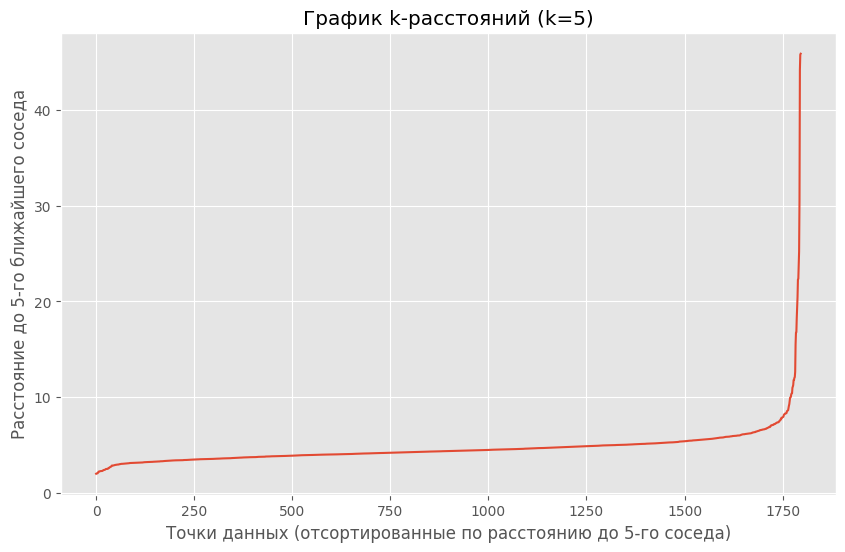

In [14]:
#  Поиск оптимальных параметров для DBSCAN
k_distances = []
for i in range(len(distances)):
    k_distances.append(np.sort(distances[i])[5]) # 5 ближайших соседей
k_distances = np.sort(k_distances)
plt.plot(k_distances)
plt.xlabel("Точки данных (отсортированные по расстоянию до 5-го соседа)")
plt.ylabel("Расстояние до 5-го ближайшего соседа")
plt.title("График k-расстояний (k=5)")
plt.show()

Наибольший "перегиб" графика наблюдается в точке eps=8

In [15]:
eps = 8
dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

In [20]:
homogeneity = homogeneity_score(y, dbscan_labels)

print(f"Однородность (DBSCAN): {homogeneity:.4f}")

Однородность (DBSCAN): 0.0061


## MNIST: Другие методы кластеризации
Ознакомьтесь с методами кластеризации и опциями различных методов на [странице scikit-learn](http://scikit-learn.org/stable/modules/clustering.html).

**Упражнение.** Изменив следующий код, попытайтесь найти для этого метод кластеризации с наибольшим показателем однородности.

In [21]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)

# your code here


__________________________________________________
   method                   time      homo
                k-means++   0.91s     0.601 
           k-means random   0.10s     0.586 


In [22]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)

method = AgglomerativeClustering(n_clusters=3)
compare_method(estimator=method, name="agglomerative", data=X)

method = DBSCAN(eps=3, min_samples=2)
compare_method(estimator=method, name="DBSCAN", data=X)

__________________________________________________
   method                   time      homo
                k-means++   2.02s     0.598 
           k-means random   0.41s     0.601 
            agglomerative   0.13s     0.363 
                   DBSCAN   0.02s     0.290 
